In [1]:
import graph_tool.all as gt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [2]:
# Loads Address and Name edge network from the previous script
g = gt.load_graph("../Data/joint_graph.gt.gz")

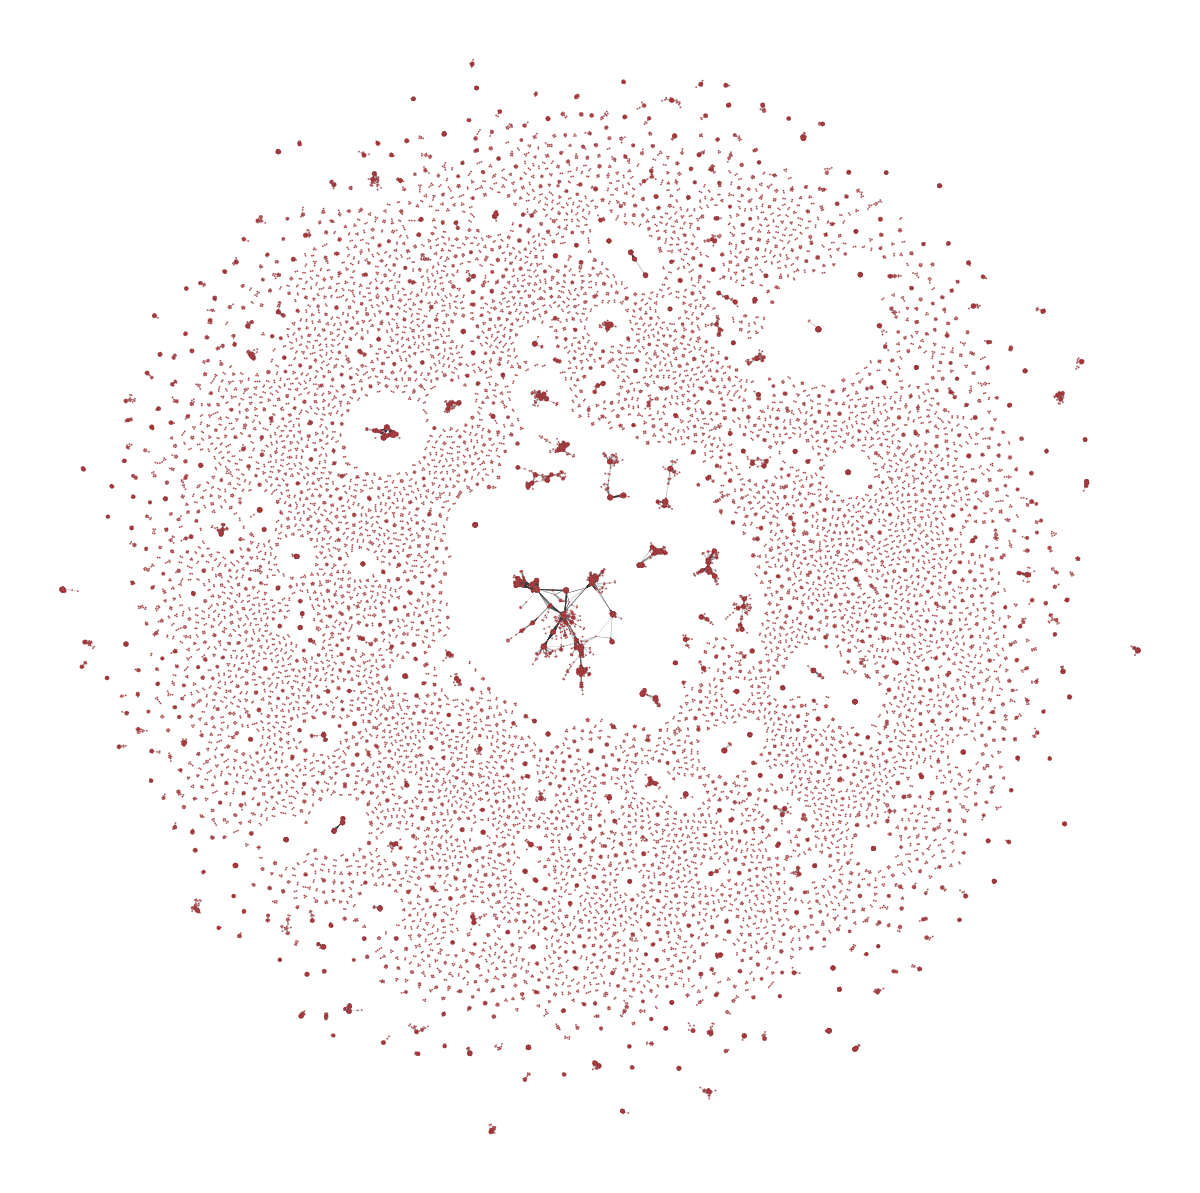

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e6e2ec590, at 0x7f0e6e312e10>

In [3]:
# Draws the entirity of the above network
gt.graph_draw(g)

In [3]:
# Selects and visualizes the largest component of the network
bigComp = gt.GraphView(g, vfilt = gt.label_largest_component(g))
bigComp = gt.Graph(bigComp, prune=True)

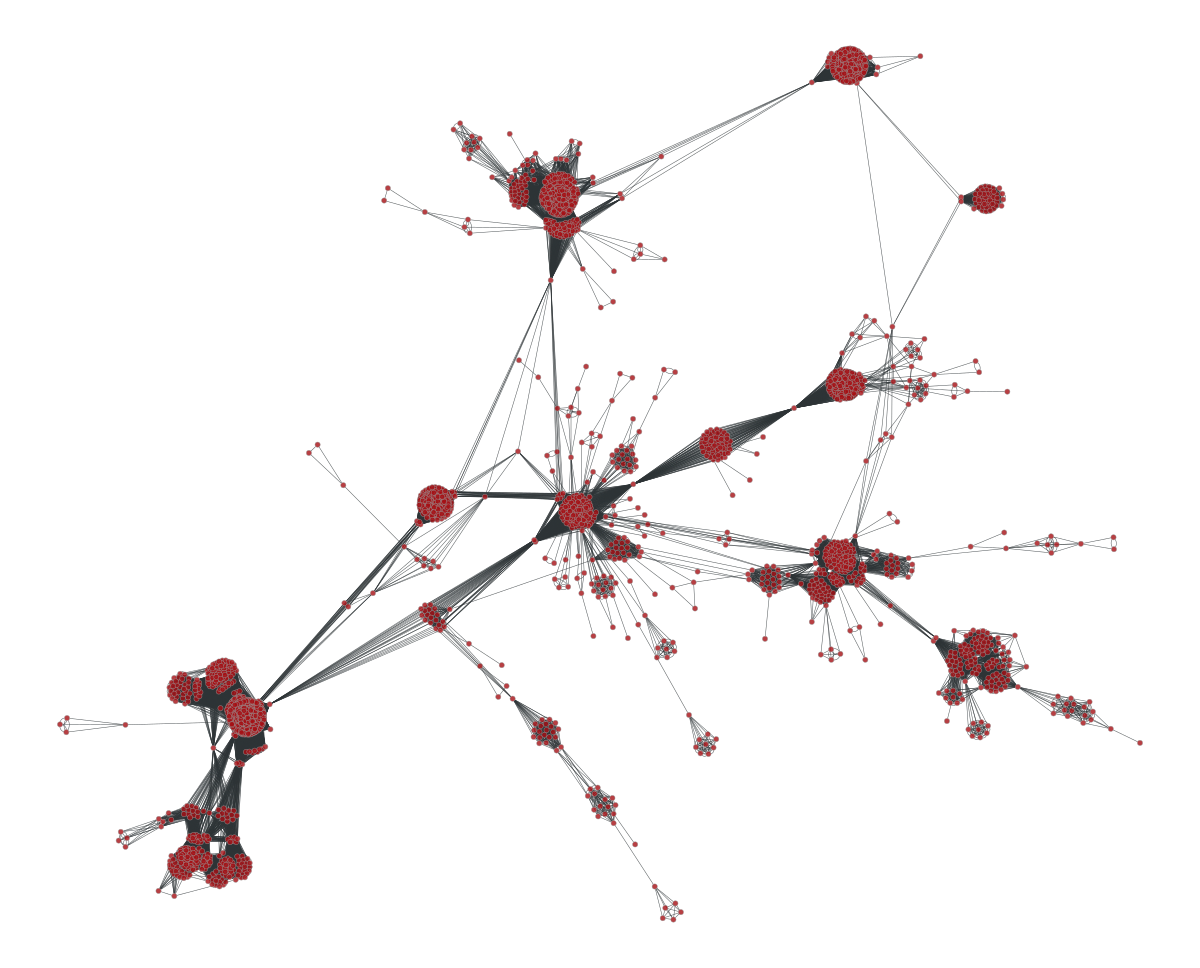

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0e6e1a9550, at 0x7f0e71e624d0>

In [5]:
gt.graph_draw(bigComp)

In [4]:
# Next section of code attached component number to the ParcelID to be joined to back to parcel data
# Creates a new vertex property with the vertex number as a label
# Simplified version (new_vp) was not working
g.properties[('v', 'vcomp')] = g.new_vertex_property("double")

In [5]:
# Saves component labels as the vcomp property on each vertex
gt.label_components(g, vprop = g.vertex_properties['vcomp'])

(<VertexPropertyMap object with value type 'double', for Graph 0x7f4ef7803a50, at 0x7f4ef7658810>,
 array([4249,  851,   31, ...,    2,    2,    2], dtype=uint64))

In [6]:
# Creates a dictionary of vertices with the index as the key and the Parcel ID and component label as values
VertexComps = {}
for v in g.iter_vertices():
    VertexComps[v] = [g.vertex_properties['ids'][v], g.vertex_properties['vcomp'][v]]

In [7]:
# Write the dictionary to a dataframe which then becomes a csv file to be exported into R for analysis
df = pd.DataFrame.from_dict(VertexComps, orient = "index", columns = ["Pid" ,"CompID"])
df

,Pid,CompID
0,15826,0.0
1,15827,0.0
2,21113,0.0
3,582,1.0
4,583,1.0
...,...,...
41391,45883,3407.0
41392,32079,5031.0
41393,49599,7160.0
41394,49884,7160.0


In [9]:
# Saves the csv file to data folder; see Evaluation.rmd for the next portion of the analysis
df.to_csv("../Data/ParcelToComp.csv")